In [1]:
import b2sim as b2

,Revenue,Expenses,Profit,Eco Impact
Farm Index,,,,
0,8520.0,0,8520.0,370.0
1,8520.0,0,8520.0,370.0
2,8080.0,5350,2730.0,351.0
3,6840.0,64350,-57510.0,321.0


The current cash and eco are (3521.0000000005334,2501.2000000000285)


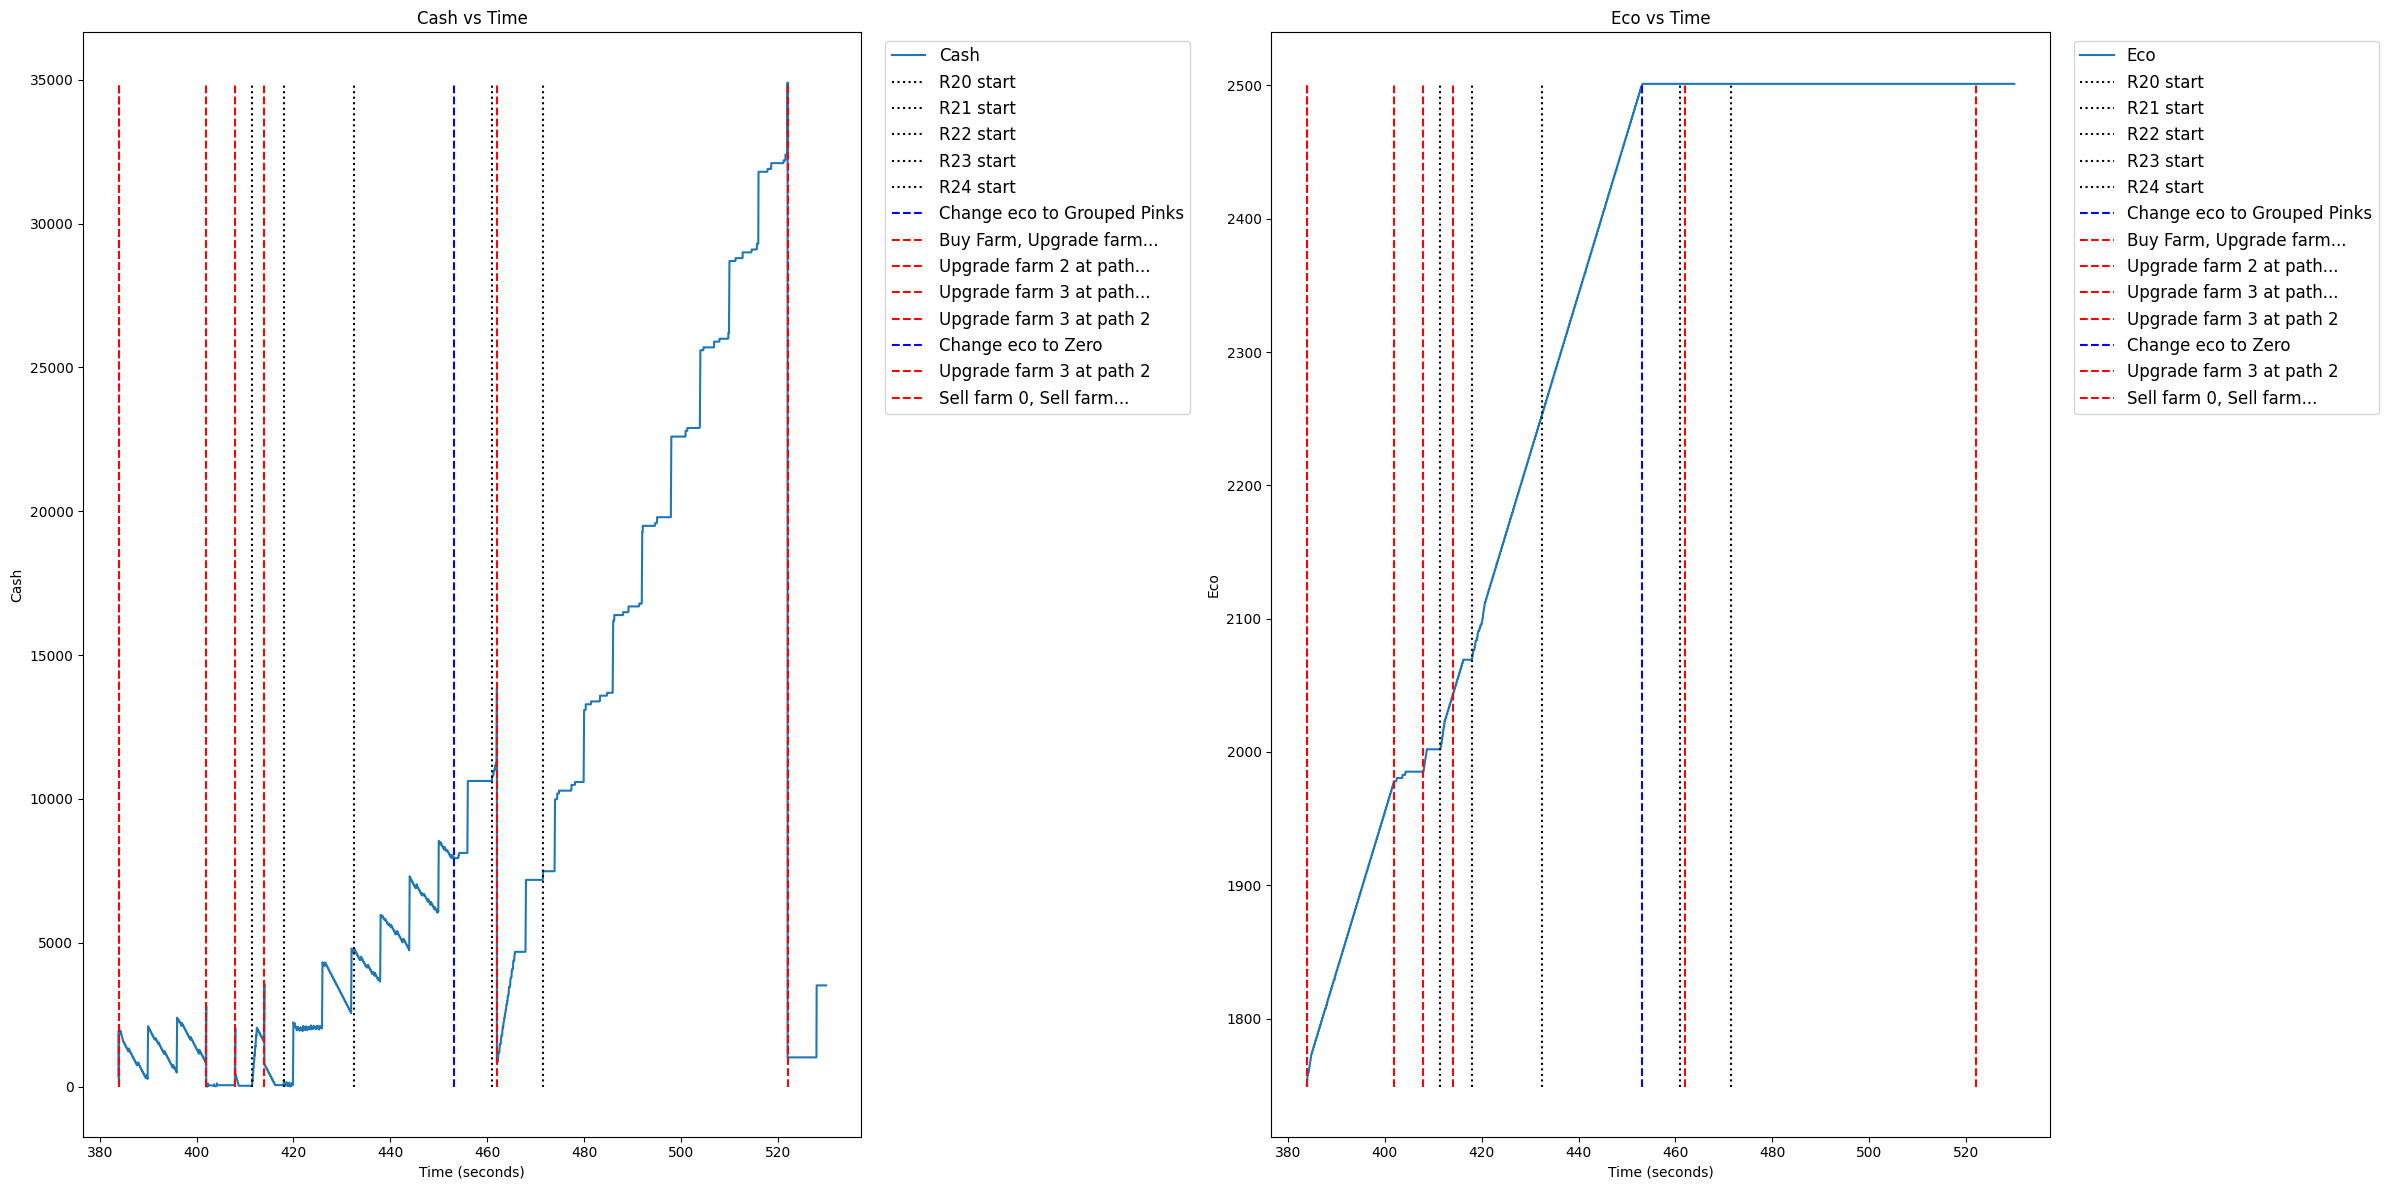

In [25]:
rounds = b2.Rounds(0.0)

farms = [
    b2.initFarm(rounds.getTimeFromRound(18.9), upgrades = [3,2,0]),
    b2.initFarm(rounds.getTimeFromRound(18.9), upgrades = [3,2,0])
]

buy_queue = [
    #Buy a 203 farm
    [b2.buyFarm()],
    [b2.upgradeFarm(2,0)],
    [b2.upgradeFarm(2,0)],
    [b2.upgradeFarm(2,2)],
    [b2.upgradeFarm(2,2)],
    [b2.upgradeFarm(2,2)],

    #Buy a 204 farm
    [b2.buyFarm()],
    [b2.upgradeFarm(3,0)],
    [b2.upgradeFarm(3,0)],
    [b2.upgradeFarm(3,2)],
    [b2.upgradeFarm(3,2)],
    [b2.upgradeFarm(3,2)],
    [b2.upgradeFarm(3,2)],

    #As soon as we have the money, sell *all* farms except the 204 and upgrade to MWS
    [b2.sellFarm(0), b2.sellFarm(1), b2.sellFarm(2), b2.upgradeFarm(3,2)]
]

initial_state_game = {
    'Cash': 1900,
    'Eco': 1750,
    'Eco Send': b2.ecoSend(send_name='Grouped Pinks', max_eco_amount=2500),
    'Rounds': rounds,
    'Game Round': 19.2,
    'Farms': farms,
    'Buy Queue': buy_queue
}

game_state = b2.GameState(initial_state_game)
game_state.fastForward(target_round = 24.999)
game_state.viewCashEcoHistory((24,12))
print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
b2.writeLog(game_state.logs, filename = 'ninjayas_R19tmf')